In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\Index2018.csv",index_col='date',parse_dates=True,dayfirst=True)#parse_dates=consider the dates as dates not string

In [3]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [4]:
#here the periods are weekly sat and sunday are excluded (business days)

In [5]:
df=df.asfreq('b')#b is used for business days

In [6]:
ftse=pd.DataFrame(df['ftse'])

In [7]:
ftse

,ftse
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [8]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ftse    6269 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


In [9]:
#here there are 2 null values so we need to fill them

In [10]:
ftse=ftse.fillna(method='ffill')# fill the datas using forward values

In [11]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ftse    6277 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


In [12]:
ftse['returns']=ftse.pct_change(periods=1)*100 # (3440.580000-3440.580000/3440.580000)*100
ftse

,ftse,returns
date,,
1994-01-07,3445.980000,NaN
1994-01-10,3440.580000,-0.156704
1994-01-11,3413.770000,-0.779229
1994-01-12,3372.020000,-1.222988
1994-01-13,3360.010000,-0.356166
...,...,...
2018-01-23,7731.827774,0.212382
2018-01-24,7643.428966,-1.143311
2018-01-25,7615.839954,-0.360951


In [22]:
# here periods =1 is the percentage change according to previous value,if period=5 then percentage change in week
#here the return value shows the day by day percentage change in profit (-ve means loss )

<Axes: xlabel='date'>

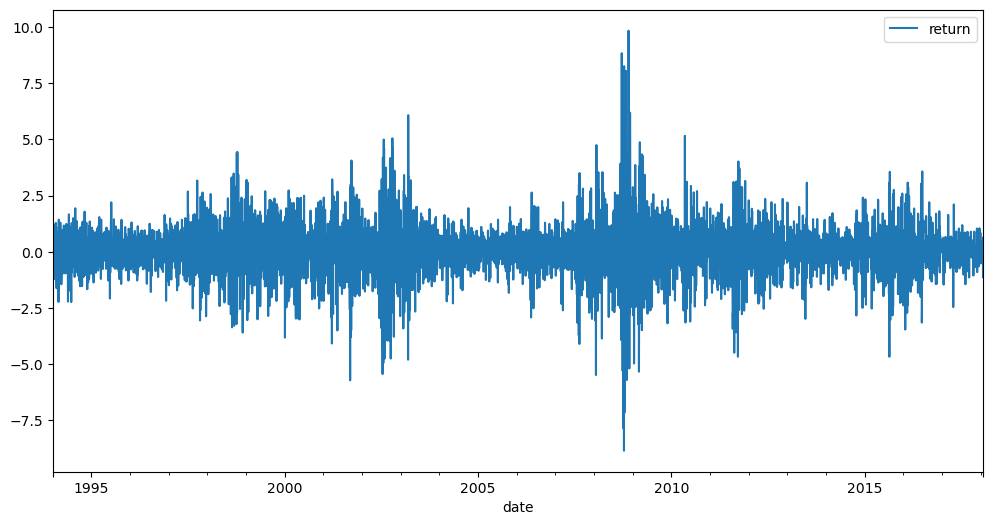

In [14]:
plt.figure(figsize=(12,6))
ftse['returns'].plot(label='return',legend=True)

### here the data have no trend or seasonality so the data is stationarity data

In [32]:
ftse.dropna(inplace=True)

In [15]:
from statsmodels.tsa.seasonal import STL

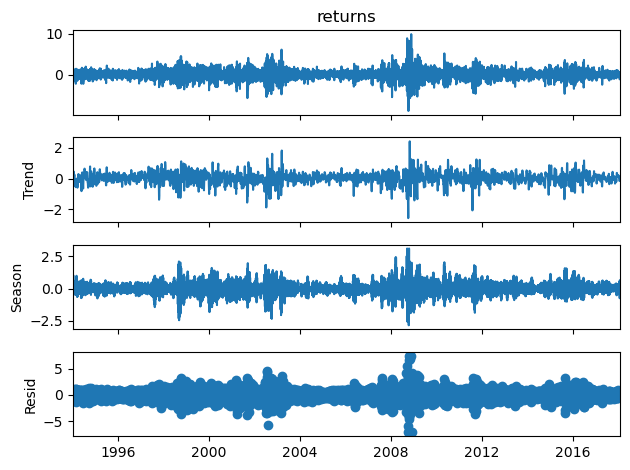

In [31]:
decomposition=STL(ftse['returns']).fit()
decomposition.plot()
plt.show()

### from stl we can understand that there is no seasonality and trend

### AUGMENTED DICKEY FULLER TEST FOR STATIONARITY

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
def adf_test(data):
    ##ho: data is not stationarity
    ##h1: data is stationarity
    if adfuller(data)[1]>0.05:
        print('fail to reject null hypothesis:data is not stationary')
    else:
        print('reject null hypothesis:data is  stationary')
        

In [30]:
adf_test(ftse['returns'])

reject null hypothesis:data is  stationary


### here we find that the data is stationarity

### now we can create a model

### now we need to find the order of AR(p) and MA(q)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict

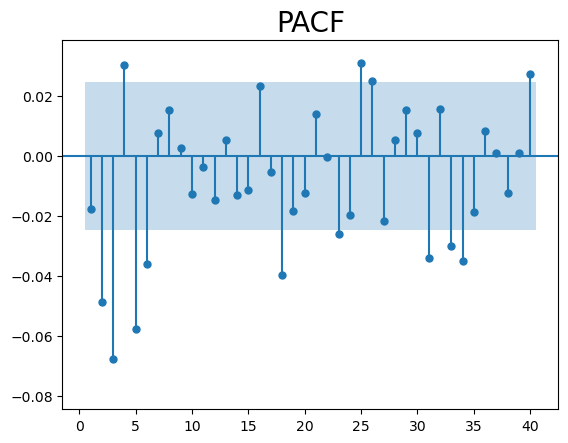

In [35]:
plot_pacf(ftse['returns'],lags=40,zero=False,auto_ylims=True)
plt.title('PACF',size=20)
plt.show()

# upto 6 we have pacf

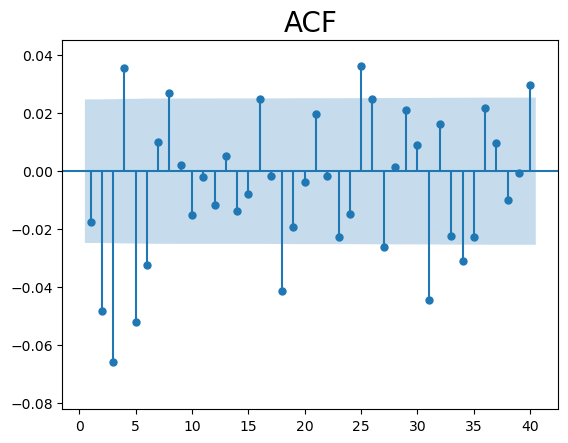

In [36]:
plot_acf(ftse['returns'],lags=40,zero=False,auto_ylims=True)
plt.title('ACF',size=20)
plt.show()

### pmdarima used to get the p and q values

In [59]:
# !pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 219.4 kB/s eta 0:00:03
   ------ ------------------------------- 112.6/614.7 kB 467.6 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/614.7 kB 532.5 kB/s eta 0:00:01
   -------------- -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [37]:
from pmdarima import auto_arima

In [38]:
auto_model=auto_arima(ftse['returns'],start_p=0,start_q=0,max_p=8,max_q=8,trace=True,seasonal=False)#trace=want to see the output process

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19201.167, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19201.289, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19201.083, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19173.711, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19169.096, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19188.689, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=19152.428, Time=1.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=19162.276, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=19154.085, Time=1.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=19151.919, Time=2.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=19175.705, Time=1.63 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=19148.756, Time=2.52 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=19133.084, Time=3.55 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=19136.618, Time=2.43 sec
 ARIMA(6,0,2)(0,0,0

### here AR=5 MA=2 I=0

In [62]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6276
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -9557.256
Date:                Thu, 25 Jan 2024   AIC                          19132.511
Time:                        17:42:32   BIC                          19193.212
Sample:                    01-10-1994   HQIC                         19153.543
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0221      0.015      1.475      0.140      -0.007       0.052
ar.L1          0.3777      0.079      4.757      0.000       0.222       0.533
ar.L2         -0.4218      0.085     -4.941      0.000      -0.589      -0.254
ar.L3         -0.0588      0.010     -6.154      0.000      -0.078      -0.040
ar.L4          0.0375      0.009      4.176      0.000       0.020       0.055
ar.L5         -0.0959      0.008    -11.972      0.000      -0.112      -0.080
ma.L1         -0.3975      0.080     -4.995      0.000      -0.553      -0.242
ma.L2          0.3797      0.087      4.372      0.000       0.210       0.550
sigma2         1.2309      0.012    105.096      0.000       1.208       1.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8767.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### HERE INTERCEPT IS BETA0 AND ARL1 TO ARL5 IS BETA1 TO BETA5 ,HERE MAL1 AND L2 IS FI1 AND FI2




### BUILD ARMA MODEL 



In [65]:
test_len=int(len(ftse)*.25)
train_len=int(len(ftse)*0.75)

In [66]:
print(test_len)
print(train_len)

1569
4707


In [121]:
1569+4707

6276

In [78]:
train_data=ftse.iloc[:train_len]
test_data=ftse.iloc[train_len:]

In [79]:
train_data

,ftse,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2012-01-18,5702.37,0.147876
2012-01-19,5741.15,0.680068
2012-01-20,5728.55,-0.219468


In [80]:
test_data

,ftse,returns
date,,
2012-01-25,5723.000000,-0.502443
2012-01-26,5795.200000,1.261576
2012-01-27,5733.450000,-1.065537
2012-01-30,5671.090000,-1.087652
2012-01-31,5681.610000,0.185502
...,...,...
2018-01-23,7731.827774,0.212382
2018-01-24,7643.428966,-1.143311
2018-01-25,7615.839954,-0.360951


In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [81]:
final_model=ARIMA(train_data['returns'],order=(5,0,2))#here 5,0,2 is AR,I,MA 

In [82]:
fitted_model=final_model.fit(method_kwargs={'maxiter':300})

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [83]:
ts_predicted=fitted_model.predict(start=train_len,end=train_len+test_len-1)#starting from end of training lenghth and end with start+end-1

In [119]:
train_len

4707

In [120]:
train_len+test_len-1

6275

In [84]:
test_data['predictions']=ts_predicted
test_data

C:\Users\aksha\AppData\Local\Temp\ipykernel_41540\3538934189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions']=ts_predicted


,ftse,returns,predictions
date,,,
2012-01-25,5723.000000,-0.502443,0.010525
2012-01-26,5795.200000,1.261576,-0.077478
2012-01-27,5733.450000,-1.065537,0.117101
2012-01-30,5671.090000,-1.087652,0.010811
2012-01-31,5681.610000,0.185502,-0.019201
...,...,...,...
2018-01-23,7731.827774,0.212382,0.018034
2018-01-24,7643.428966,-1.143311,0.018034
2018-01-25,7615.839954,-0.360951,0.018034


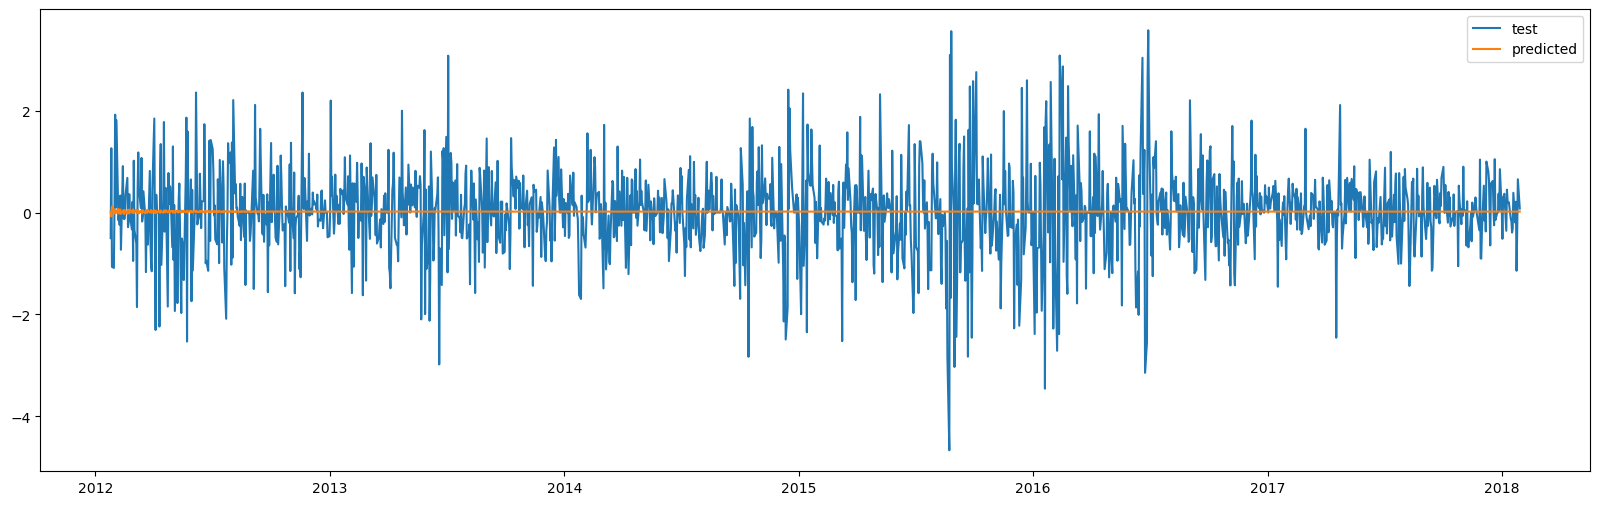

In [94]:
plt.figure(figsize=(20,6))
plt.plot(test_data['returns'],label='test')
plt.plot(ts_predicted,label='predicted')
plt.legend()
plt.show()

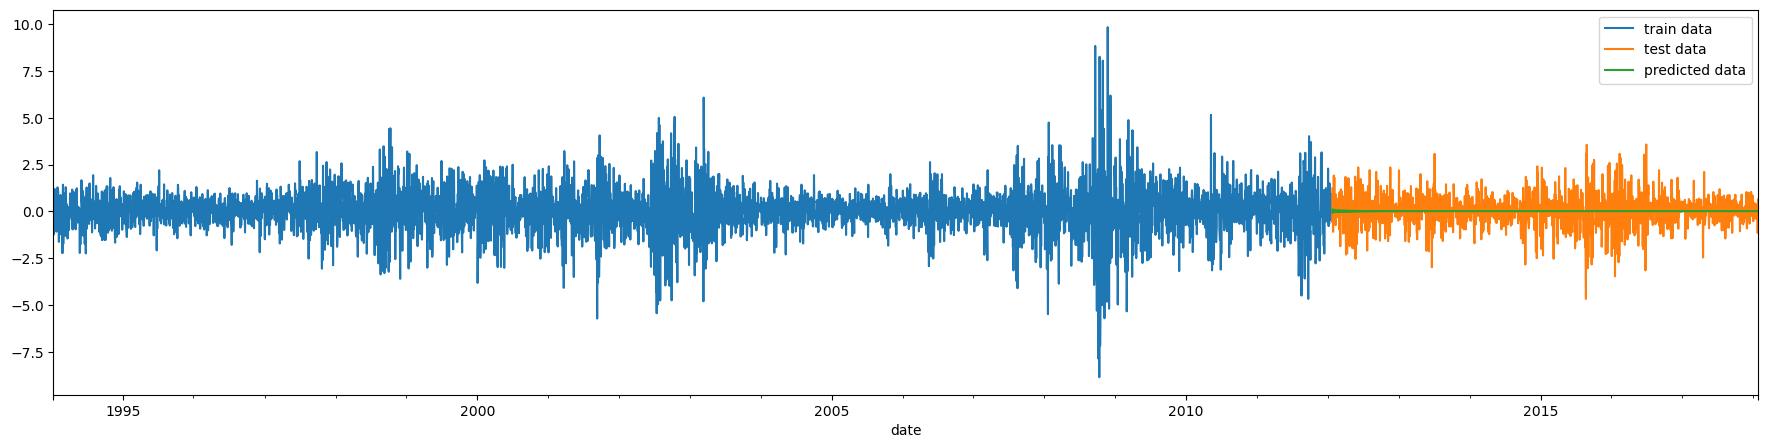

In [92]:
plt.figure(figsize=(22,5))
train_data['returns'].plot(label='train data',legend=True)
test_data['returns'].plot(label='test data',legend=True)
ts_predicted.plot(label='predicted data',legend=True)
plt.show()

### as the data is stationarity the output will a kind of constant

In [96]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [97]:
mean_squared_error(test_data['returns'],test_data['predictions'])

0.7133950494484468

In [98]:
mean_absolute_error(test_data['returns'],test_data['predictions'])

0.6020819496596845

In [99]:
mean_absolute_percentage_error(test_data['returns'],test_data['predictions'])

2971129544959.04

In [102]:
res=fitted_model.resid

<Axes: xlabel='date'>

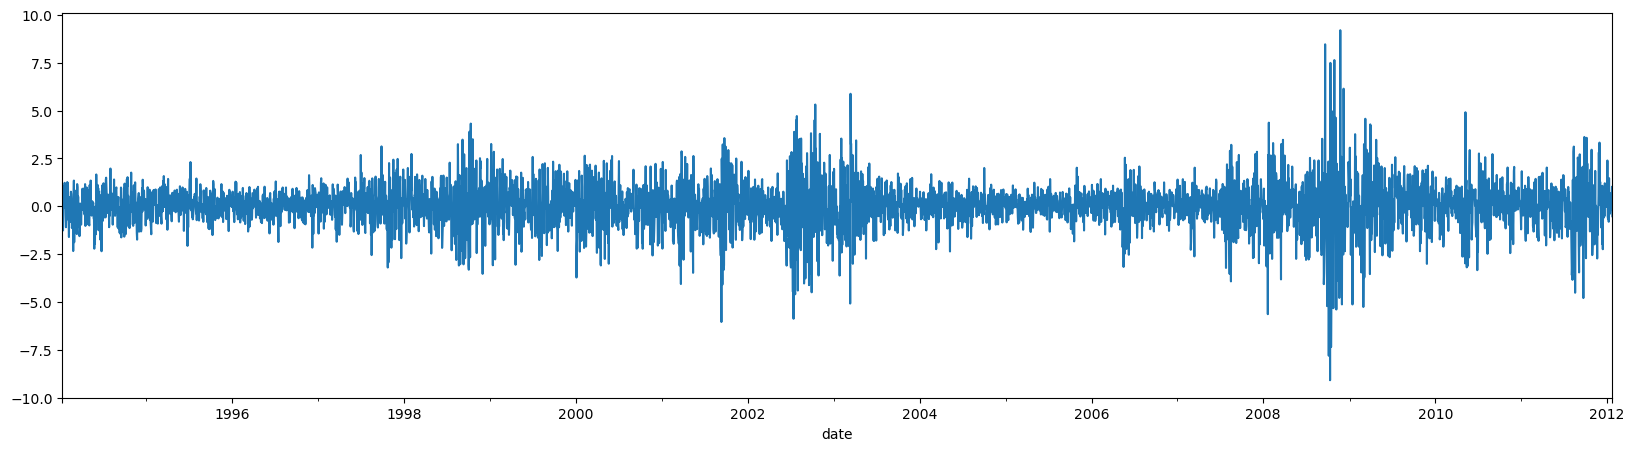

In [104]:
plt.figure(figsize=(20,5))
res.plot()

### here there are no patterns in the resid

### we are going to find the acf value and pacf value to fing the auto correlation btwn resid

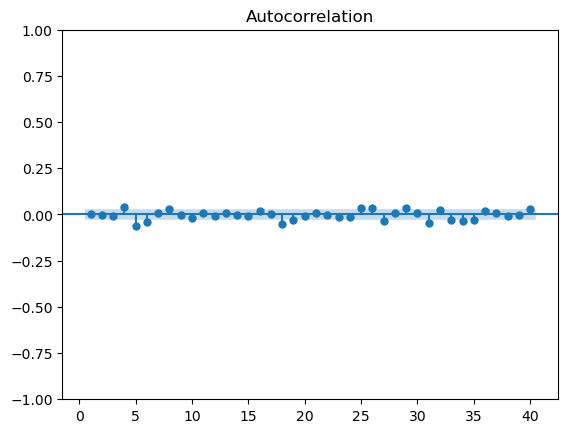

In [107]:
plot_acf(res,lags=40,zero=False,auto_ylims=False)
plt.show()

In [108]:
import seaborn as sns

<Axes: ylabel='Count'>

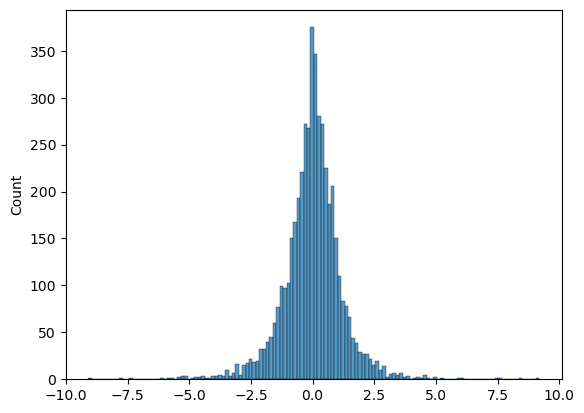

In [109]:
sns.histplot(res)

In [111]:
res.skew()

-0.14591644725507763

In [112]:
res.kurtosis()

5.656737722090279

### rebuild model with full data

In [113]:
full_model=ARIMA(ftse['returns'],order=(5,0,2)).fit(method_kwargs={'maxiter':300})

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [116]:
predt_final=full_model.predict(start=len(ftse),end=len(ftse)+test_len)

In [114]:
len(ftse)

6276

In [115]:
len(ftse)+test_len

7845

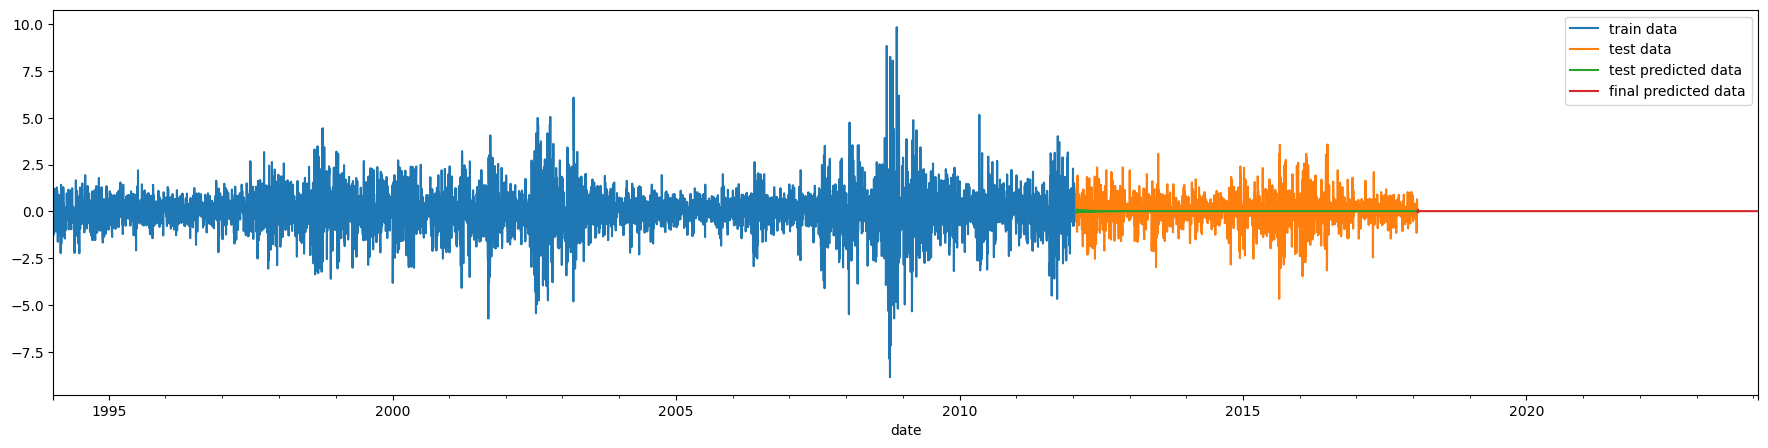

In [118]:
plt.figure(figsize=(22,5))
train_data['returns'].plot(label='train data',legend=True)
test_data['returns'].plot(label='test data',legend=True)
ts_predicted.plot(label='test predicted data',legend=True)
predt_final.plot(label='final predicted data',legend=True)
plt.show()